In [1]:
import areia 
import numpy as np

from astropy.io import fits
from matplotlib import pyplot as plt

Testing AREIA for a source in the CANDELS GOODS-S field, in the F160W band

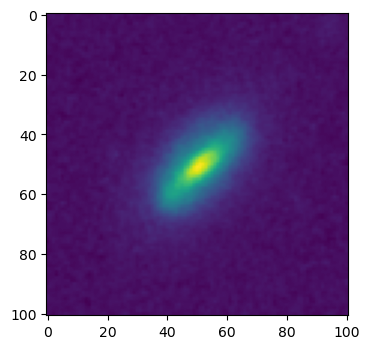

In [2]:
bright_galaxy = fits.getdata('example.fits')
psf = fits.getdata('psf.fits')

f = plt.subplots(1, dpi=100)
plt.imshow(bright_galaxy)

We define two frames, the initial and the target frame. The initial frame holds the true information of the observation and instrument setup while the target is the one to be simulated.

### Test flux preserved when changing pixel scale

Expectation: pixel scale doubled, but same source flux, so total counts/sec integrated over the source should be preserved. Flux in individual source pixels should increase by factor of four.

In [124]:
initial_frame = areia.ObservationFrame(0.1, pixelscale=0.06, exptime=5e4)
target_frame = areia.ObservationFrame(0.1, pixelscale=0.12, exptime=5e4)

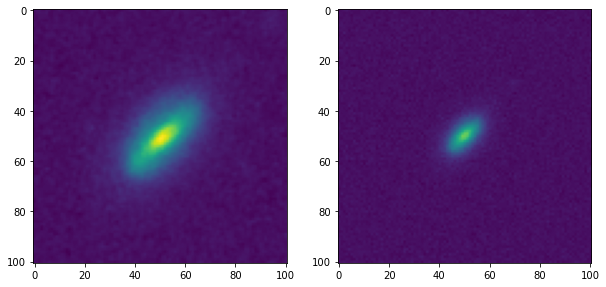

In [125]:
AR = areia.ArtificialRedshift(bright_galaxy, psf, None, initial_frame, target_frame)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
im1 = ax1.imshow(bright_galaxy)
vmin = bright_galaxy.min()
vmax = bright_galaxy.max()
ax1.imshow(bright_galaxy, vmin=vmin, vmax=vmax)
ax2.imshow(AR.final, vmin=vmin, vmax=vmax)

In [126]:
bright_galaxy.shape, AR.final.shape

((101, 101), (101, 101))

In [127]:
bright_galaxy.sum(), AR.final.sum()

(128.62807, 32.058855627667945)

**Flux not preserved!**

### Test flux preserved for 'identity' (but psf re-convolved)

Expectation: convolution should redistribute light, but not change the total light. Addition of noise should not change total flux systematically.

In [128]:
initial_frame = areia.ObservationFrame(0.1, pixelscale=0.06, exptime=5e4)
target_frame = areia.ObservationFrame(0.1, pixelscale=0.06, exptime=5e4)

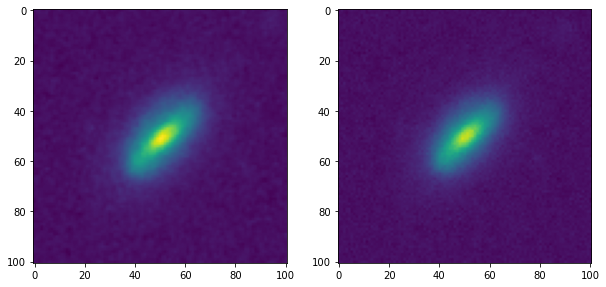

In [129]:
AR = areia.ArtificialRedshift(bright_galaxy, psf, None, initial_frame, target_frame)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
vmin = bright_galaxy.min()
vmax = bright_galaxy.max()
ax1.imshow(bright_galaxy, vmin=vmin, vmax=vmax)
ax2.imshow(AR.final, vmin=vmin, vmax=vmax)

In [130]:
bright_galaxy.shape, AR.final.shape

((101, 101), (101, 101))

In [136]:
np.median(bright_galaxy), np.median(AR.final)

(0.0023540063, 0.0024889904828539378)

In [131]:
bright_galaxy.sum(), AR.final.sum()

(128.62807, 112.68730580317398)

**Flux not preserved!**